In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
import scipy.misc
import pickle

In [3]:
#Returns TMRCA distribution after 100 generations, given a sample Ne and generation time.  
#Scaled in kya

def DistTMRCA(n, Ne, gen,nsamps=100):
    tmpSum = 0
    myData = []
    for j in range(0,n):
        tmpSum = 0
        for i in range(2,nsamps+1):
            rate = scipy.misc.comb(i,2)
            dist = np.random.exponential(size = 1, scale = 1/rate)
            tmpSum = tmpSum+dist*Ne*gen/1000
        tmpSum =float(tmpSum)
        myData.append(tmpSum)
    return myData




In [6]:
#TMRCA distriubtion generation commented out here:  Load TMRCA distributions with Pickle below

Mbuti = DistTMRCA(100000, 3700, 26.5)
Baka  = DistTMRCA(100000, 1800, 31.5)

pickle.dump(Mbuti, open("Mbuti.100K.save","wb"))
pickle.dump(Baka, open("Baka.100K.save","wb"))

#ChimpAuto_r1 = pickle.load( open( "/Users/moetjens/Dropbox/KiddLab-Matt/Chimp Manuscript/TMRCA Sampling/ChimpAuto_r1.100K.save", "rb" ))


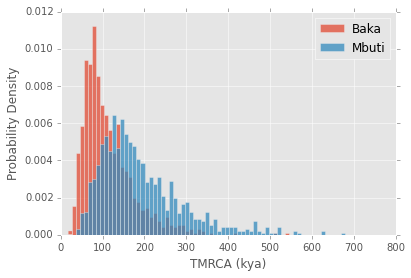

In [4]:
#histogram w/ Pandas

myTicksX = range(0, 1200, 100)
myLimX = [0,800] 

merged = pd.DataFrame({'Mbuti': Mbuti, 'Baka': Baka})
myPlot = merged.plot(kind='hist' , xticks= myTicksX, xlim =myLimX ,alpha=0.75, bins=100, normed = True)

myPlot.set_xlabel('Count')
myPlot.set_xlabel('TMRCA (kya)')
myPlot.set_ylabel('Probability Density')

In [11]:
#Returns effective Y chromosomes and Mito (in that order)

def effectiveChroms(R, Nauto):
    Nf = Nauto*(1 + R)/(4*R)
    Nm = Nf*R
    NchrY = Nm/2
    Nmito = Nf/2
    return NchrY,Nmito

#ex.
#chrY, mito  = effectiveChroms(0.5,56300) 


In [20]:
#Some chimpanzee population test simulations
#Nauto is estimated from the PSMC analysis (Table S5), the sum of the Nes of the 4 subspecies(mu = 1e-9, yrs/gen = 25)
#multipied by 2, since there are two genomes for each individual
#don't think you sould mulitple by 2.  want y/nauto to be 1/4 when it is setup
#see:
#print effectiveChroms(1,1000)

#TMRCA distriubtion generation commented out here:  Load TMRCA distributions with Pickle below

Nauto = 56300 #approx size at last split
NchrY, Nmito = effectiveChroms(1, Nauto) 

#ChimpAuto_r1 = DistTMRCA(100000, Nauto, 25,2)
#ChimpY_r1 = DistTMRCA(100000, NchrY, 25,2)
#ChimpMito_r1 = DistTMRCA(100000, Nmito, 25,2)


#ChimpAuto_r1 = DistTMRCA(100000, Nauto, 25)
#ChimpY_r1 = DistTMRCA(100000, NchrY, 25)
#ChimpMito_r1 = DistTMRCA(100000, Nmito, 25)

#pickle.dump(ChimpAuto_r1, open("ChimpAuto_r1.100K.save","wb"))
#pickle.dump(ChimpY_r1, open("ChimpY_r1.100K.save","wb"))
#pickle.dump(ChimpMito_r1, open("ChimpMito_r1.100K.save","wb"))


Nauto = 56300 #approx size at last split
NchrY, Nmito = effectiveChroms(0.5, Nauto) 

#ChimpAuto_r05 = DistTMRCA(100000, Nauto, 25)
#ChimpY_r05 = DistTMRCA(100000, NchrY, 25)
#ChimpMito_r05 = DistTMRCA(100000, Nmito, 25)

#pickle.dump(ChimpAuto_r05, open("ChimpAuto_r05.100K.save","wb"))
#pickle.dump(ChimpY_r05, open("ChimpY_r05.100K.save","wb"))
#pickle.dump(ChimpMito_r05, open("ChimpMito_r05.100K.save","wb"))

In [4]:
ChimpAuto_r1 = pickle.load( open( "/Users/moetjens/Dropbox/KiddLab-Matt/Chimp Manuscript/TMRCA Sampling/ChimpAuto_r1.100K.save", "rb" ))
ChimpY_r1 = pickle.load( open( "/Users/moetjens/Dropbox/KiddLab-Matt/Chimp Manuscript/TMRCA Sampling/ChimpY_r1.100K.save", "rb" ))
ChimpMito_r1 = pickle.load( open( "/Users/moetjens/Dropbox/KiddLab-Matt/Chimp Manuscript/TMRCA Sampling/ChimpMito_r1.100K.save", "rb" ))

ChimpAuto_r05 = pickle.load( open( "/Users/moetjens/Dropbox/KiddLab-Matt/Chimp Manuscript/TMRCA Sampling/ChimpAuto_r05.100K.save", "rb" ))
ChimpY_r05 = pickle.load( open( "/Users/moetjens/Dropbox/KiddLab-Matt/Chimp Manuscript/TMRCA Sampling/ChimpY_r05.100K.save", "rb" ))
ChimpMito_r05 = pickle.load( open( "/Users/moetjens/Dropbox/KiddLab-Matt/Chimp Manuscript/TMRCA Sampling/ChimpMito_r05.100K.save", "rb" ))


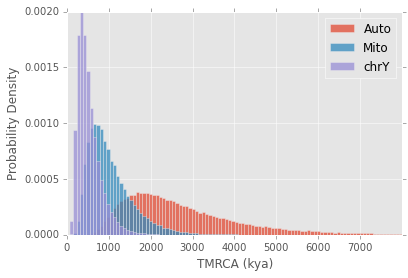

In [5]:
#merged = pd.DataFrame({'chrY': ChimpY_r1, 'Mito': ChimpMito_r1, 'Auto':ChimpAuto_r1})
merged = pd.DataFrame({'chrY': ChimpY_r05, 'Mito': ChimpMito_r05, 'Auto':ChimpAuto_r05})

xlim = 8000

myTicksX = range(0, xlim,1000)
myLimX = [0,xlim] 
myPlot = merged.plot(kind='hist' , xticks= myTicksX, xlim =myLimX ,alpha=0.75, bins=200, normed = True)

myPlot.set_xlabel('Count')
myPlot.set_xlabel('TMRCA (kya)')
myPlot.set_ylabel('Probability Density')


#y = P.normpdf( bins, 420, 58.6)
#l = P.plot(bins, y, 'k--', linewidth=1.5)
#P.figure

In [42]:
deltaTMRCA = []
for i in range(len(ChimpY_r1)):
    deltaTMRCA.append(ChimpMito_r1[i]-ChimpY_r1[i])

    
deltaTMRCA_r05 = []  
for i in range(len(ChimpY_r05)):
    deltaTMRCA_r05.append(ChimpMito_r05[i]-ChimpY_r05[i])


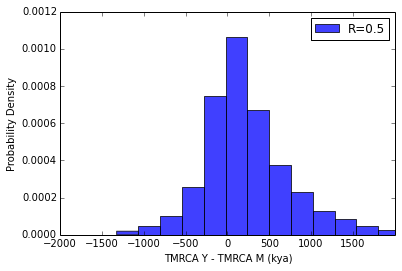

In [49]:
delta = pd.DataFrame({'R=0.5': deltaTMRCA_r05})

xlim = 2000

myTicksX = range(-xlim, xlim,500)
myLimX = [-xlim,xlim] 
myPlot = delta.plot(kind='hist' , xticks= myTicksX, xlim =myLimX ,alpha=0.75, bins=20, normed = True)

myPlot.set_xlabel('Count')
myPlot.set_xlabel('TMRCA Y - TMRCA M (kya)')
myPlot.set_ylabel('Probability Density')
